In [18]:
import pandas as pd

# Import the pandas library and assign it the alias 'pd'

# Use a try-except block to handle potential errors
try:
    # Read the CSV file located at the specified path into a DataFrame, using ';' as the delimiter
    df = pd.read_csv('AirQualityUCI.csv', delimiter=';')
    
    # Display the first few rows of the DataFrame
    display(df.head())

# Handle the case where the file is not found
except FileNotFoundError:
    # Print an error message if the file is not found
    print(f"Error: The file 'AirQualityUCI.csv' was not found.")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [20]:
try:
    df = pd.read_csv('AirQualityUCI.csv', delimiter=';')

    # Columns to convert to numeric, handling errors
    cols_to_convert = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
    for col in cols_to_convert:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce')

    # Drop unnecessary columns
    df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

    display(df.head())

except FileNotFoundError:
    print(f"Error: The file 'AirQualityUCI.csv' was not found.")

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [21]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types of each column
print("\nData Types of each column:\n", df.dtypes)

# Check for missing values
print("\nNumber of missing values in each column:\n", df.isnull().sum())

# Identify time columns
time_columns = ['Date', 'Time']
print(f"\nTime columns: {time_columns}")
print(f"Data types of time columns:\n{df[time_columns].dtypes}")

# Identify numerical columns
numerical_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
print("\nNumerical columns:", numerical_cols)
print("Data types of numerical features:\n", df[numerical_cols].dtypes)

# Display descriptive statistics for numerical features
print("\nDescriptive statistics for numerical features:\n", df[numerical_cols].describe())

Shape of the DataFrame: (9471, 15)

Data Types of each column:
 Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

Number of missing values in each column:
 Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

Time columns: ['Date', 'Time']
Data types of time columns:
Date    object
Time    object
dtype: object

Numerical columns: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'P

In [7]:
import numpy as np

# Replace -200 with np.nan
numerical_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
df[numerical_cols] = df[numerical_cols].replace(-200, np.nan)

# Fill NaN values with the median for numerical features
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Combine 'Date' and 'Time' into a single datetime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Check data types
print(df.dtypes)
display(df.head())

Date                     object
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
DateTime         datetime64[ns]
dtype: object


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


In [8]:
# Calculate descriptive statistics for numerical columns
numerical_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
print(df[numerical_cols].describe())

# Group data by month and calculate the mean of 'CO(GT)'
df['Month'] = df['DateTime'].dt.month
monthly_co = df.groupby('Month')['CO(GT)'].mean()
print(monthly_co)

# Identify interesting patterns (example)
#  Check for months with significantly higher or lower CO levels
#  Further analysis can be done to understand the reasons behind these variations.

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9471.000000  9471.000000  9471.000000  9471.000000    9471.000000   
mean      2.085820  1097.966424   156.640693     9.987668     937.625172   
std       1.315415   211.661265    66.657341     7.270307     260.065263   
min       0.100000   647.000000     7.000000     0.100000     383.000000   
25%       1.200000   943.000000   150.000000     4.600000     744.000000   
50%       1.800000  1063.000000   150.000000     8.200000     909.000000   
75%       2.600000  1218.000000   150.000000    13.500000    1102.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9471.000000   9471.000000  9471.000000   9471.000000  9471.000000   
mean    234.514729    833.998839   112.332700   1456.605955  1019.870024   
std     194.006563    250.307741    43.684741    337.321954   388.476425   
min       2

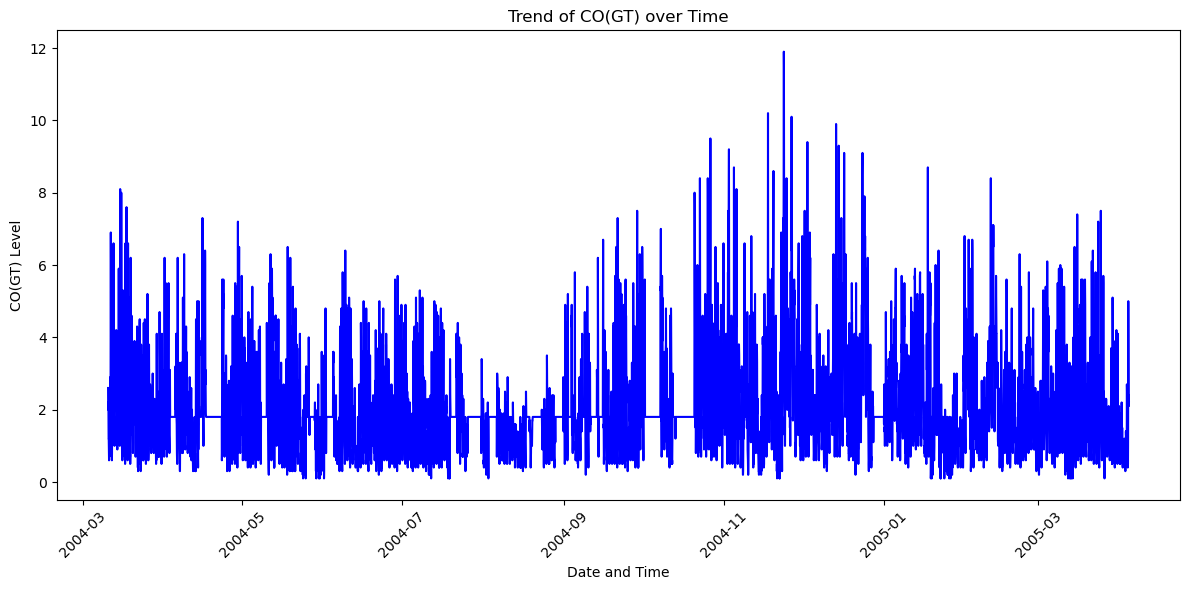

In [9]:
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.plot(df['DateTime'], df['CO(GT)'], color='blue')
plt.xlabel('Date and Time')
plt.ylabel('CO(GT) Level')
plt.title('Trend of CO(GT) over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

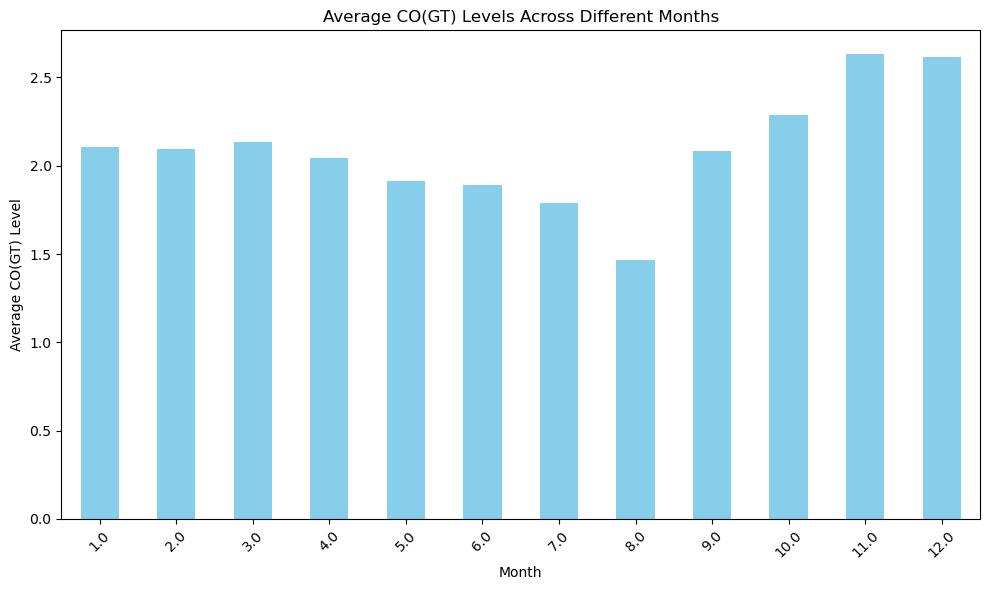

In [10]:
import matplotlib.pyplot as plt

# Group data by month and calculate the mean of 'CO(GT)'
monthly_co = df.groupby('Month')['CO(GT)'].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
monthly_co.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average CO(GT) Level')
plt.title('Average CO(GT) Levels Across Different Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

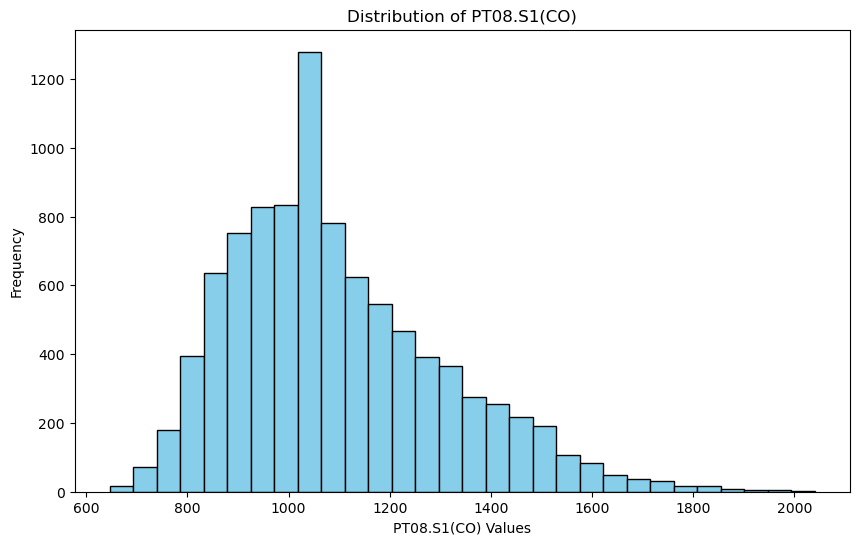

In [11]:
import matplotlib.pyplot as plt

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['PT08.S1(CO)'], bins=30, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.xlabel('PT08.S1(CO) Values')
plt.ylabel('Frequency')
plt.title('Distribution of PT08.S1(CO)')
plt.show()

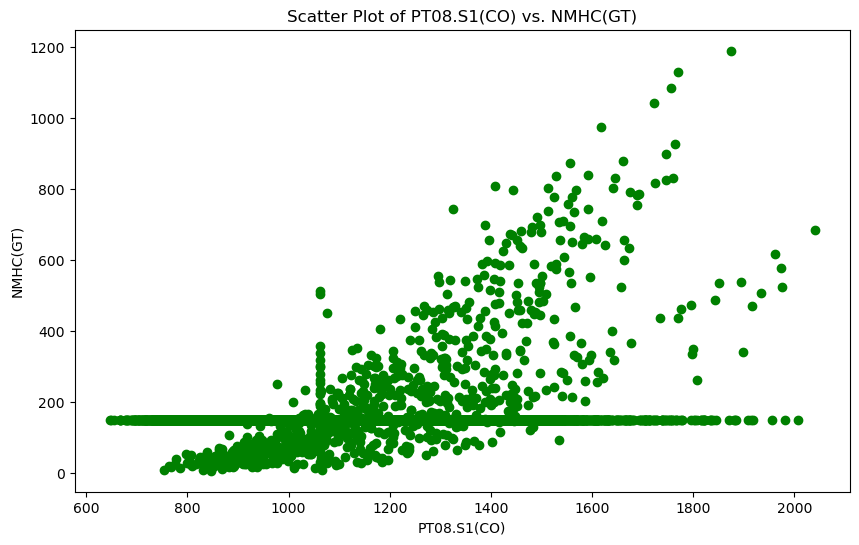

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['PT08.S1(CO)'], df['NMHC(GT)'], color='green')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('NMHC(GT)')
plt.title('Scatter Plot of PT08.S1(CO) vs. NMHC(GT)')
plt.show()